In [1]:
election<- read.csv("../Data//election_2022.csv")
head(election)
tail(election)
str(election)
summary(election)
sum(is.na(election))

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  

[1] 0

In [2]:
library(plotrix)
library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [185]:
votesum <- aggregate(투표수~광역시도,election,sum)
votesum
total <- sum(votesum[,2])
total
voteratio <- data.frame(광역시도=votesum$광역시도,투표율=round(votesum$투표수/total*100,2))
voteratio <-arrange(voteratio,desc(투표율))
voteratio



광역시도,투표수
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831
세종특별자치시,231832


[1] 33764664

광역시도,투표율
경기도,25.23
서울특별시,19.26
부산광역시,6.52
경상남도,6.36
인천광역시,5.58
경상북도,5.25
대구광역시,4.77
충청남도,3.92
전라남도,3.80
전라북도,3.66


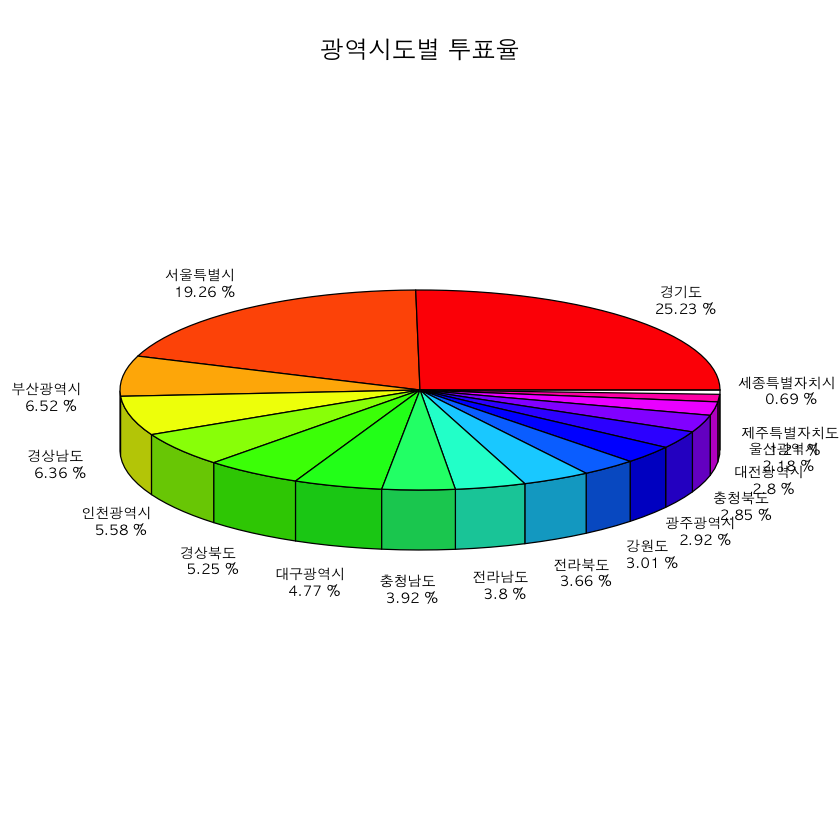

In [4]:
par(family ="AppleGothic")
options(warn = -1)
label <- paste(voteratio$광역시도,"\n",voteratio$투표율,"%")
pie3D(voteratio$투표율,  #3D라고 적어주기 
   main ="광역시도별 투표율",
    labels = label,  #기본값이 레인보우여서 색지정하지 않아도 됨
      labelcex=0.7
   )

In [5]:
# electionSum = 이재명 + 윤석열 + 심상정

election$electionSum <- apply(election[,5:7],1,sum)
head(election)


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [6]:
# electionRation <- 투표수 대비 electionSum 의 퍼센트 구해서 넣기

election$electionRatio <- election$electionSum/election$투표수*100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [7]:
# 3명의 후보를 가장 많이 선택한 지역/Volumes/Data/Data/election_2022_job1.csv과 가장 적게 선택한 지역 구하기

#1) 정렬을 통해 구하기 
library(dplyr)
arrange(election,desc(electionRatio))[1,]

arrange(election,electionRatio)[1,]
arrange(election,desc(electionRatio))[nrow(election),]

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [8]:
# 2)subset 
subset(election,electionRatio==max(election$electionRatio))
subset(election,electionRatio==min(election$electionRatio))

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


In [9]:
# election_2022_job1.csv로 저장하기
write.csv(election,"../Data/election_2022_job1.csv",row.names=F)

---

In [32]:
# 각 후보 (윤석열, 이재명, 심상정)의 광역시도별 득표율을 3D Pie Chart로 표현하기 
#(단, 득표율이 3% 미만인 광역시도는 광역시도명만 출력고 퍼센트는 출력하지 않는다,/ 퍼센트 단위는 소수 한자리 )


voteyoon <-aggregate(윤석열~광역시도,election,sum)

yoon <-data.frame(광역시도=votesum$광역시도,윤득표율=round(voteyoon$윤석열/sum(voteyoon$윤석열)*100,1))
yoon <-arrange(yoon, desc(윤득표율))
yoon

광역시도,윤득표율
경기도,23.7
서울특별시,20.0
경상북도,7.9
부산광역시,7.8
경상남도,7.6
대구광역시,7.4
인천광역시,5.4
충청남도,4.1
강원도,3.4
충청북도,3.0


In [ ]:
library(plotrix)

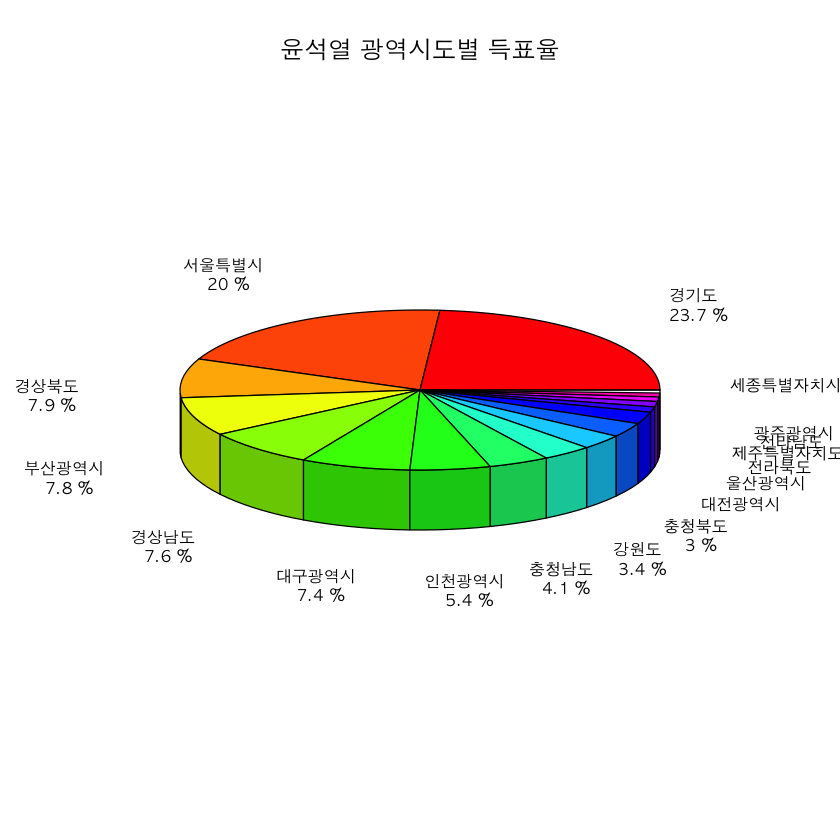

In [34]:
par(family ="AppleGothic")
label <- ifelse(yoon$윤득표율<3,paste(yoon$광역시도),paste(yoon$광역시도,"\n",yoon$윤득표율,"%"))
pie3D(yoon$윤득표율,  #3D라고 적어주기 
   main ="윤석열 광역시도별 득표율",
    labels = label,  #기본값이 레인보우여서 색지정하지 않아도 됨
      labelcex=0.8,
      radius=0.8
   )

In [47]:
# 수도권(경기도, 서울, 인천) 의 투표인구수의 퍼센트?
votesum <- arrange(votesum,desc(투표수))
votesum
round(sum(votesum[c(1:2,5),2])/sum(votesum$투표수)*100,2)


광역시도,투표수
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168
전라북도,1235212


[1] 50.06

---
### 윤석열 후보의 서울 득표 top5 구하고 나머지 지역은 기타로 합치기 

In [100]:
# 서울 특별시 데이터마 발췌

#subset(election,광역시도=='서울특별시')
#다른방법
election_Seoul <- election[election$광역시도=='서울특별시',]
election_seoul_윤석열 <- arrange(election_Seoul,desc(윤석열))[,c(2,6)]
election_seoul_윤석열

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593
관악구,151944
양천구,149780
은평구,140666
동작구,135733


In [107]:
# ratio 구하기
election_seoul_윤석열_ratio <-
round(c(election_seoul_윤석열[1:5,2],sum(election_seoul_윤석열[-c(1:5),2]))/sum(election_seoul_윤석열$윤석열)*100,2)

election_seoul_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [111]:
# label 만들기
election_Seoul_윤석열_label <- c(as.character(election_seoul_윤석열$시군구[1:5]),'기타')
election_Seoul_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

In [166]:
# 대선주자 출생지별 득표율 분석
#- 윤석열 후보의 출생지는 서울특별시 성북구
election_성북구 <- subset(election,시군구=='성북구')
election_성북구


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
8,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12141


In [172]:
# ratio 구하기
윤석열_성북구<-election_성북구[,5:7]/election_성북구$투표수*100
성북구_data <- as.numeric(c(윤석열_성북구,기타=100-sum(election_성북구[,5:7]/election_성북구$투표수*100)))
성북구_dataall<- data.frame(사람=c('이재명','윤석열','심상정','기타'), 득표율=성북구_data)
성북구_dataall

사람,득표율
이재명,48.839271
윤석열,46.218346
심상정,3.063791
기타,1.878591


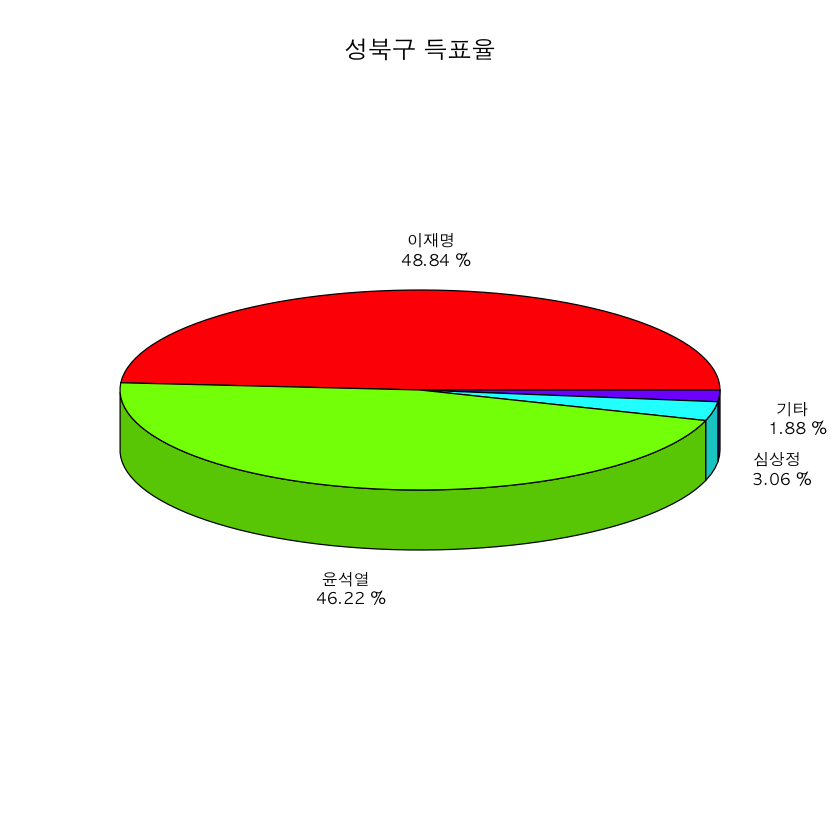

In [187]:
library(plotrix)
par(family ="AppleGothic")
label <- paste(성북구_dataall$사람,"\n",round(성북구_dataall$득표율,2),"%")
pie3D(성북구_dataall$득표율,
      main ="성북구 득표율",
    labels = label,  #기본값이 레인보우여서 색지정하지 않아도 됨
      labelcex=0.8,
   
      )